In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install math
# !pip install statsmodels
# !pip install matplotlib
# !pip install seaborn
# !pip install itertools
# !pip install scipy
# !pip install pyarrow
# !pip install sklearn
# !pip install nltk
# !pip install catboost
# !pip install hyperopt
# !pip install xgboost
# !pip install lightgbm


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
# import graphviz
# import pydotplus

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import svm
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import pandas as pd
import numpy as np
import math
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss

seed = 42

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#@title Function for Confusion Matrix Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/train.csv"
data = pd.read_csv(path, sep=",", index_col="session_id")
data = data.drop_duplicates()
data.sort_values(by='time1', inplace = True)
data.head()

,webpage1,time1,webpage2,time2,webpage3,time3,webpage4,time4,webpage5,time5,...,time6,webpage7,time7,webpage8,time8,webpage9,time9,webpage10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
13694,880,2018-01-12 04:00:57,867.0,2018-01-12 04:00:57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34657,880,2018-01-12 04:32:23,867.0,2018-01-12 04:32:23,880.0,2018-01-12 05:02:07,867.0,2018-01-12 05:02:09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
48835,12450,2018-01-12 04:45:13,12450.0,2018-01-12 04:45:14,12515.0,2018-01-12 04:45:15,12450.0,2018-01-12 04:45:15,12450.0,2018-01-12 04:45:16,...,2018-01-12 04:45:16,12476.0,2018-01-12 04:45:16,10344.0,2018-01-12 04:45:16,12489.0,2018-01-12 04:45:17,12450.0,2018-01-12 04:45:17,0
71986,12437,2018-01-12 04:45:17,12476.0,2018-01-12 04:45:17,12489.0,2018-01-12 04:45:18,12476.0,2018-01-12 04:45:18,12437.0,2018-01-12 04:45:18,...,2018-01-12 04:45:18,12463.0,2018-01-12 04:45:19,12437.0,2018-01-12 04:45:19,12450.0,2018-01-12 04:45:19,12450.0,2018-01-12 04:45:20,0
92602,12463,2018-01-12 04:45:20,12502.0,2018-01-12 04:45:20,12476.0,2018-01-12 04:45:20,12463.0,2018-01-12 04:45:21,12502.0,2018-01-12 04:45:21,...,2018-01-12 04:45:21,12450.0,2018-01-12 04:45:21,12515.0,2018-01-12 04:45:22,12450.0,2018-01-12 04:45:22,12463.0,2018-01-12 04:45:22,0


In [ ]:
path2 = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/test.csv"
final_test = pd.read_csv(path2, sep=",")
final_test.sort_values(by='time1', inplace = True)

In [ ]:
path3 = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/id_map.parquet"
id_map = pd.read_parquet(path3, engine='pyarrow')
id_map = id_map.drop_duplicates()
id_map.head()

,id,webpage
0,326127,www.abmecatronique.com
1,182113,groups.live.com
2,551820,majeureliguefootball.wordpress.com
3,401995,cdt46.media.tourinsoft.eu
4,105504,www.hdwallpapers.eu


# 1. Webpage Info Preprocessing

In [ ]:
id_map.dtypes

id          int64
webpage    object
dtype: object

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "lxml") # "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', ' ', text)

#Special character counter
def special_character_counter(text):
    counter = 0
    for i in text:
        if i in ".+*?^$)(][}{|\-_:;,":
            counter += 1
    return counter

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    lowercase_text = text.lower()
    return lowercase_text
#Apply function on review column
id_map["special_char"] = id_map["webpage"].apply(lambda x: special_character_counter(x))
id_map["url_length"]=id_map["webpage"].apply(lambda x: len(x))
id_map["webpage"]=id_map["webpage"].apply(denoise_text)

In [ ]:
# def google_index(url):
#   site = search(url, 5)
#   return 1 if site else 0
id_map["ip"] = id_map["webpage"].str.contains('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
id_map["ip"] = id_map["ip"].apply(int)
# id_map["redirecting"] = id_map["webpage"].str.contains('//')
id_map["prefix_suffix"] = id_map["webpage"].apply(lambda x: x.count("-"))
#id_map["count?"] = id_map["webpage"].apply(lambda x: x.count("?"))
#id_map["count%"] = id_map["webpage"].apply(lambda x: x.count("%"))
id_map["count."] = id_map["webpage"].apply(lambda x: x.count("."))
# id_map["count="] = id_map["webpage"].apply(lambda x: x.count("="))
id_map["http"] = id_map["webpage"].str.contains('http')
id_map["http"] = id_map["http"].apply(int)

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,' ',text)
    return text
#Apply function on review column
id_map["webpage"]=id_map["webpage"].apply(remove_special_characters)

In [ ]:
id_map.head()

,id,webpage,special_char,url_length,ip,prefix_suffix,count.,http
0,326127,www abmecatronique com,2,22,0,0,2,0
1,182113,groups live com,2,15,0,0,2,0
2,551820,majeureliguefootball wordpress com,2,34,0,0,2,0
3,401995,cdt46 media tourinsoft eu,3,25,0,0,3,0
4,105504,www hdwallpapers eu,2,19,0,0,2,0


In [ ]:
stop=set(stopwords.words('english'))

def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    # 3. Join the words back into one string separated by space
    text= ' '.join(meaningful_words)
    return text


def preprocess(review: str, total: int, show_progress: bool = True) -> list:
    if show_progress:
        global counter
        counter += 1
        #print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Split into individual words
    tokens = word_tokenize(review)
    # 2. Lemmatize
    lemmas = lemmatize(tokens)
    return lemmas

In [ ]:
counter = 0
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
id_map["webpage"] = np.array(list(map(lambda x: preprocess(x, len(id_map["webpage"])), id_map["webpage"])))
counter = 0

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.15, max_df=0.85,binary=False,ngram_range=(1,3))
#transformed train reviews
id_map_vec = cv.fit_transform(id_map["webpage"])
id_map_vec = pd.DataFrame(id_map_vec.toarray(),
                          columns = cv.get_feature_names_out())


In [ ]:
id_map_vec.head()

,com,fr,net,www
0,1,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,1


In [ ]:
id_map_final = pd.concat([id_map[["special_char", "url_length", "ip", "prefix_suffix", "count.", "http"]], id_map_vec], axis=1)
id_map_final = pd.concat([id_map["id"], id_map_final], axis=1)
id_map_final.set_index('id', inplace=True)
id_map_final.head()

,special_char,url_length,ip,prefix_suffix,count.,http,com,fr,net,www
id,,,,,,,,,,
326127,2,22,0,0,2,0,1,0,0,1
182113,2,15,0,0,2,0,1,0,0,0
551820,2,34,0,0,2,0,1,0,0,0
401995,3,25,0,0,3,0,0,0,0,0
105504,2,19,0,0,2,0,0,0,0,1


# 2. Main Data

In [ ]:
print("Shape:", data.shape)
print("Column Types Count:\n", data.dtypes.value_counts())
print(data.dtypes)

Shape: (159953, 21)
Column Types Count:
 object     10
float64     9
int64       2
dtype: int64
webpage1       int64
time1         object
webpage2     float64
time2         object
webpage3     float64
time3         object
webpage4     float64
time4         object
webpage5     float64
time5         object
webpage6     float64
time6         object
webpage7     float64
time7         object
webpage8     float64
time8         object
webpage9     float64
time9         object
webpage10    float64
time10        object
target         int64
dtype: object


id_maps uses integers as ids so I will change the ids in original data from float to integers as well.

In [ ]:
# sns.heatmap(data.isna());
# plt.title('Visualization of NAs in dataset (white - missing values)\n');

We can see that there is no missing values in our data, just for some of the samples the session ended on the first webpage.

In [ ]:
data["missing_count"] = data.isnull().sum(axis=1)
final_test["missing_count"] = final_test.isnull().sum(axis=1)

In [ ]:
webpage_features = list(data.select_dtypes('number').columns)
webpage_features.remove("target")
webpage_features.remove("missing_count")
datetime_features = list(data.select_dtypes('object').columns)
print(webpage_features, datetime_features)

['webpage1', 'webpage2', 'webpage3', 'webpage4', 'webpage5', 'webpage6', 'webpage7', 'webpage8', 'webpage9', 'webpage10'] ['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10']


In [ ]:
for i in range(1, 10):
    data[datetime_features[i]].fillna(data[datetime_features[i-1]], inplace=True)
    final_test[datetime_features[i]].fillna(final_test[datetime_features[i-1]], inplace=True)
for i in range(1, 10):
    data[webpage_features[i]].fillna(data[webpage_features[i-1]], inplace=True)
    final_test[webpage_features[i]].fillna(final_test[webpage_features[i-1]], inplace=True)

In [ ]:
# Number of NaN values and the percentage by column
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

               Total  Percent
webpage1           0      0.0
time1              0      0.0
target             0      0.0
time10             0      0.0
webpage10          0      0.0
time9              0      0.0
webpage9           0      0.0
time8              0      0.0
webpage8           0      0.0
time7              0      0.0
webpage7           0      0.0
time6              0      0.0
webpage6           0      0.0
time5              0      0.0
webpage5           0      0.0
time4              0      0.0
webpage4           0      0.0
time3              0      0.0
webpage3           0      0.0
time2              0      0.0
webpage2           0      0.0
missing_count      0      0.0


Lets change all the webpage info to ints.

In [ ]:
for column in webpage_features[1:]:
    data[column] = data[column].astype(dtype="int64", copy=True, errors="ignore")
    final_test[column] = final_test[column].astype(dtype="int64", copy=True, errors="ignore")

In [ ]:
for i in range(0, 10):
    data[datetime_features[i]] = pd.to_datetime(data[datetime_features[i]])
    final_test[datetime_features[i]] = pd.to_datetime(final_test[datetime_features[i]])

In [ ]:
for i in range(1, 10):
    data[f"delta{i}"] = (data[datetime_features[i]] - data[datetime_features[i-1]]).dt.total_seconds()
    data[f"delta{i}"] = data[f"delta{i}"].astype(dtype="int64", copy=True, errors="ignore")
    final_test[f"delta{i}"] = (final_test[datetime_features[i]] - final_test[datetime_features[i-1]]).dt.total_seconds()
    final_test[f"delta{i}"] = final_test[f"delta{i}"].astype(dtype="int64", copy=True, errors="ignore")

In [ ]:
data["delta_sum"] = (data[datetime_features[9]] - data[datetime_features[0]]).dt.total_seconds()
data["delta_sum"] = data["delta_sum"].astype(dtype="int64", copy=True, errors="ignore")
final_test["delta_sum"] = (final_test[datetime_features[9]] - final_test[datetime_features[0]]).dt.total_seconds()
final_test["delta_sum"] = final_test["delta_sum"].astype(dtype="int64", copy=True, errors="ignore")

In [ ]:
def hr_func(ts):
    return ts.hour

data["hour"] = data["time1"].apply(hr_func)
data["weekday"] = data["time1"].dt.isocalendar().day
data["month"] = data["time1"].dt.month
data["day"] = data["time1"].dt.day
data["hour"] = data["hour"].apply(int)
data["weekday"] = data["weekday"].apply(int)
data["month"] = data["month"].apply(int)
data["day"] = data["day"].apply(int)

final_test["hour"] = final_test["time1"].apply(hr_func)
final_test["weekday"] = final_test["time1"].dt.isocalendar().day
final_test["month"] = final_test["time1"].dt.month
final_test["day"] = final_test["time1"].dt.day
final_test["hour"] = final_test["hour"].apply(int)
final_test["weekday"] = final_test["weekday"].apply(int)
final_test["month"] = final_test["month"].apply(int)
final_test["day"] = final_test["day"].apply(int)

Now I will drop the time columns except the first one to identify when the session started.

In [ ]:
for col in datetime_features[1:]:
    if col in data.columns:
        data= data.drop([col], axis=1)
        final_test= final_test.drop([col], axis=1)

In [ ]:
data.head()

,webpage1,time1,webpage2,webpage3,webpage4,webpage5,webpage6,webpage7,webpage8,webpage9,...,delta5,delta6,delta7,delta8,delta9,delta_sum,hour,weekday,month,day
session_id,,,,,,,,,,,,,,,,,,,,,
13694,880,2018-01-12 04:00:57,867,867,867,867,867,867,867,867,...,0,0,0,0,0,0,4,5,1,12
34657,880,2018-01-12 04:32:23,867,880,867,867,867,867,867,867,...,0,0,0,0,0,1786,4,5,1,12
48835,12450,2018-01-12 04:45:13,12450,12515,12450,12450,12437,12476,10344,12489,...,0,0,0,1,0,4,4,5,1,12
71986,12437,2018-01-12 04:45:17,12476,12489,12476,12437,12450,12463,12437,12450,...,0,1,0,0,1,3,4,5,1,12
92602,12463,2018-01-12 04:45:20,12502,12476,12463,12502,12528,12450,12515,12450,...,0,0,1,0,0,2,4,5,1,12


# 3. Joining the Datasets

In [ ]:
base_cols = id_map_final.columns
for col_name in base_cols:
        data[f"{col_name}_sum"] = 0
for col_name in base_cols:
        final_test[f"{col_name}_sum"] = 0
num = 1
for col in webpage_features:
    new_cols = []
    for col_name in base_cols:
        new_cols.append(col_name+f"_{num}")
    id_map_final.columns = new_cols
    data = data.merge(id_map_final, left_on=col, right_on='id', how='left')
    for col_name in base_cols:
        data[f"{col_name}_sum"] = data[f"{col_name}_sum"] + data[col_name+f"_{num}"]
        data = data.drop([col_name+f"_{num}"], axis=1)
    final_test = final_test.merge(id_map_final, left_on=col, right_on='id', how='left')
    for col_name in base_cols:
        final_test[f"{col_name}_sum"] = final_test[f"{col_name}_sum"] + final_test[col_name+f"_{num}"]
        final_test = final_test.drop([col_name+f"_{num}"], axis=1)
    num += 1

In [ ]:
df_true = data[data.target == 1]
df_false = data[data.target == 0]
descriptive_stats = df_true.describe(include='all')
print(descriptive_stats)
descriptive_stats = df_false.describe(include='all')
print(descriptive_stats)

<ipython-input-491-33b727a14405>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = df_true.describe(include='all')
<ipython-input-491-33b727a14405>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = df_false.describe(include='all')


             webpage1                time1       webpage2       webpage3  \
count     1575.000000                 1575    1575.000000    1575.000000   
unique            NaN                 1569            NaN            NaN   
top               NaN  2018-02-12 12:28:55            NaN            NaN   
freq              NaN                    2            NaN            NaN   
first             NaN  2018-02-12 12:20:10            NaN            NaN   
last              NaN  2019-02-25 13:51:01            NaN            NaN   
mean     38237.072381                  NaN   37213.753651   35261.929524   
std      88894.804793                  NaN   83575.289289   81405.763899   
min        165.000000                  NaN     191.000000     165.000000   
25%       1140.000000                  NaN    1140.000000    1140.000000   
50%       3129.000000                  NaN    3636.000000    3129.000000   
75%      19899.000000                  NaN   25099.000000   19899.000000   
max     3551

I noticed that on average the webpage_id_sum and delta_sum are different for the classes, and that the cases of our user having a session are close to each other(I understood this by watching the table on google sheets). Thus I desided to add a rolling sum for the mentioned columns which will provide kind of a time series help to the model.

In [ ]:
data["webpage_id_sum"] = 0
final_test["webpage_id_sum"] = 0

for col in webpage_features:
  data["webpage_id_sum"] = data["webpage_id_sum"] + data[col]
  final_test["webpage_id_sum"] = final_test["webpage_id_sum"] + final_test[col]

In [ ]:
data["webpage_around"] = data["webpage_id_sum"].rolling(20, center=True).sum()
data["delta_around"] = data["delta_sum"].rolling(20, center=True).sum()
final_test["webpage_around"] = final_test["webpage_id_sum"].rolling(20, center=True).sum()
final_test["delta_around"] = final_test["delta_sum"].rolling(20, center=True).sum()

In [ ]:
# df_true = data[data.target == 1]
# df_false = data[data.target == 0]
# descriptive_stats = df_true.describe(include='all')
# print(descriptive_stats)
# descriptive_stats = df_false.describe(include='all')
# print(descriptive_stats)

webpage1            -0.006289
webpage2            -0.007236
webpage3            -0.009392
webpage4            -0.008295
webpage5            -0.010559
webpage6            -0.009708
webpage7            -0.009273
webpage8            -0.009566
webpage9            -0.010630
webpage10           -0.008307
target               1.000000
missing_count       -0.022766
delta1              -0.011797
delta2              -0.010638
delta3              -0.011619
delta4              -0.011291
delta5              -0.009229
delta6              -0.009707
delta7              -0.010330
delta8              -0.012726
delta9              -0.012333
delta_sum           -0.027270
hour                 0.089196
weekday              0.032719
month                0.039943
day                 -0.008680
special_char_sum     0.045218
url_length_sum      -0.001765
ip_sum               0.046734
prefix_suffix_sum    0.066771
count._sum          -0.016475
http_sum            -0.005034
com_sum              0.006435
fr_sum    

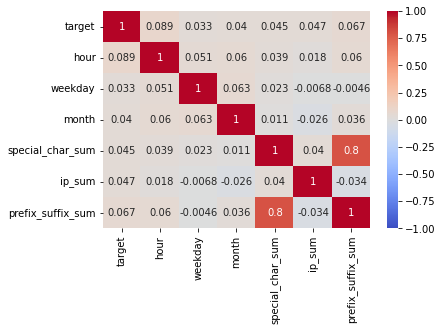

In [ ]:
corr = data.corr()
print(corr["target"])
condition = np.abs(corr["target"]) > 0.03
top_corr = corr.loc[condition, condition]
sns.heatmap(top_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

# 4. Separation and Normalization

In [ ]:
data_train = data[:100000]
data_test = data[100000:]

In [ ]:
if "time1" in data_train.columns:
    data = data.drop(["time1"], axis=1)
    data_train = data_train.drop(["time1"], axis=1)
    data_test = data_test.drop(["time1"], axis=1)
    final_test= final_test.drop(["time1"], axis=1)

In [ ]:
y = data["target"]
X = data.drop(["target"], axis=1)

y_train = data_train["target"]
y_test = data_test["target"]
X_train = data_train.drop(["target"], axis=1)
X_test = data_test.drop(["target"], axis=1)

In [ ]:
final_test.sort_values(by="session_id", inplace = True)
if "session_id" in final_test.columns:
    final_test = final_test.drop(["session_id"], axis=1)
X_result = final_test

In [ ]:
continious_features = list(X_train.columns)

In [ ]:
# set_config(transform_output="pandas")
num_pipe = Pipeline([
    # ('imputer', SimpleImputer(strategy='mean')),
     # using minmax scaler to have all the data in the range (0,1)
    ('scaler', MinMaxScaler())
])

pipe = ColumnTransformer(transformers=[
    ('num', num_pipe, continious_features),

], verbose_feature_names_out=False)

In [ ]:
X_train_tr = pipe.fit_transform(X_train)
X_test_tr = pipe.transform(X_test)

In [ ]:
X_tr = pipe.fit_transform(X)
X_result_tr = pipe.transform(X_result)

# 5. Base Models

In [ ]:
def evaluate_model(classifier, train_set, train_target, test_set, test_target, metrics=[roc_auc_score]):
    prediction = train_model(classifier, train_set, train_target, test_set)
    results = get_model_metrics(classifier.__class__.__name__, test_target, prediction, metrics=[roc_auc_score])
    return results


def train_model(classifier, train_set, train_target, test_set):
    classifier.fit(train_set, train_target)
    return classifier.predict_proba(test_set)


def get_model_metrics(classifier_name, test_target, prediction, metrics=[roc_auc_score]):
    mectrics_result = dict()
    for metric in metrics:
        score = metric(test_target, prediction[:, 1])
        print("{} for model {} = {:.3f}".format(metric.__name__, classifier_name, score))
        mectrics_result[metric.__name__] = score
    mectrics_result['classifier'] = classifier_name
    return mectrics_result


In [ ]:
lgbm_clf = LGBMClassifier(random_state=seed)#, max_depth=7)

# calibrated_clf = CalibratedClassifierCV(lgbm_clf, cv=5)
result_dict = evaluate_model(lgbm_clf, X_train, y_train, X_test, y_test)

roc_auc_score for model LGBMClassifier = 0.865


In [ ]:
rd_clf = RandomForestClassifier(random_state=seed)#, max_depth=7)

# calibrated_clf = CalibratedClassifierCV(rd_clf, cv=5)
result_dict = evaluate_model(rd_clf, X_train, y_train, X_test, y_test)

roc_auc_score for model RandomForestClassifier = 0.826


In [ ]:
cat_clf = CatBoostClassifier(random_state=seed, verbose=False, max_depth=12)
# calibrated_clf = CalibratedClassifierCV(cat_clf, cv=5)
result_dict = evaluate_model(cat_clf, X_train, y_train, X_test, y_test)

roc_auc_score for model CatBoostClassifier = 0.921


# 6. Feature Importances

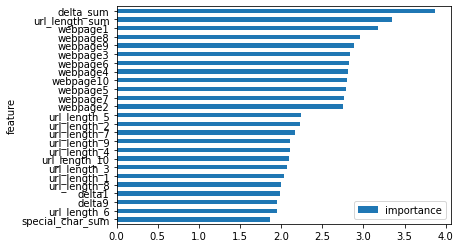

In [ ]:
model = RandomForestClassifier()

model.fit(X_tr, y)

importances = model.feature_importances_
indices = np.argsort(importances)

# fig, ax = plt.subplots()
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(tv_X_train_lm.columns)[indices])
importances = model.feature_importances_
feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:x*100,importances))
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[25:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

Most important features. We can see that the most important feature was the delta_sum which was the

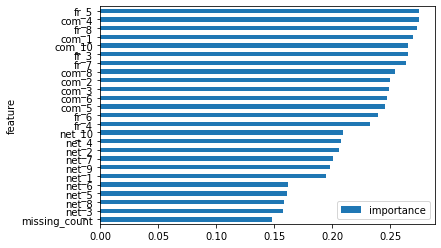

In [ ]:
feature_importance_new = feature_importance[:25]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

Least important parameters, that later I eliminated. Some of the parts in the notebook are not consequent, as I was mainly consentrated on the better results of the model.

# 7. Hyperparameter Tunning

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': int(space['max_depth']),
        'learning_rate': float('{:.3f}'.format(space['learning_rate'])),
        'subsample' : float('{:.3f}'.format(space['subsample'])),
        'n_estimators': int(space['n_estimators'])
    }

    clf1 = CatBoostClassifier(
        # objective ='binary:logistic',
        random_state=seed,
        verbose=False,
        **params
    )

    skf = StratifiedKFold(n_splits=5)
    score = cross_val_score(clf1, X, y, scoring='roc_auc', cv=skf).mean()
    print("AUC {:.3f} params {}".format(score, params))
    return {'loss':1 - score, 'status': STATUS_OK }

space = {
    'max_depth': hp.choice('max_depth', [6, 7, 8, 9, 10]),
    'learning_rate': hp.uniform('learning_rate', 0.0, 1.0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'n_estimators': hp.choice('n_estimators', [100, 500, 1000])
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

AUC 0.718 params {'max_depth': 9, 'learning_rate': 0.301, 'subsample': 0.868, 'n_estimators': 100}
AUC 0.718 params {'max_depth': 10, 'learning_rate': 0.734, 'subsample': 0.569, 'n_estimators': 1000}
AUC 0.708 params {'max_depth': 9, 'learning_rate': 0.193, 'subsample': 0.915, 'n_estimators': 1000}
AUC 0.707 params {'max_depth': 10, 'learning_rate': 0.124, 'subsample': 0.621, 'n_estimators': 100}
AUC 0.707 params {'max_depth': 6, 'learning_rate': 0.543, 'subsample': 0.966, 'n_estimators': 500}
AUC 0.696 params {'max_depth': 9, 'learning_rate': 0.66, 'subsample': 0.843, 'n_estimators': 500}
AUC 0.701 params {'max_depth': 10, 'learning_rate': 0.471, 'subsample': 0.806, 'n_estimators': 500}
AUC 0.690 params {'max_depth': 7, 'learning_rate': 0.726, 'subsample': 0.842, 'n_estimators': 100}
AUC 0.686 params {'max_depth': 6, 'learning_rate': 0.874, 'subsample': 0.518, 'n_estimators': 100}
AUC 0.690 params {'max_depth': 9, 'learning_rate': 0.918, 'subsample': 0.902, 'n_estimators': 1000}
100%|

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': int(space['max_depth']),
#         'learning_rate': float('{:.3f}'.format(space['learning_rate'])),
#         'subsample' : float('{:.3f}'.format(space['subsample'])),
        'scale_pos_weight': int(space['scale_pos_weight'])
    }

    clf1 = LGBMClassifier(#scale_pos_weight=10,
        # objective ='binary:logistic',
        random_state=seed,
        # verbose=False,
        **params
    )

    score = cross_val_score(clf1, X, y, scoring='roc_auc', cv=5).mean()
    print("AUC {:.3f} params {}".format(score, params))
    return {'loss':1 - score, 'status': STATUS_OK }

space = {
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7]),
#     'learning_rate': hp.uniform('learning_rate', 0.0, 1.0),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 5, 10, 25, 50, 75, 100])
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

AUC 0.699 params {'max_depth': 5, 'scale_pos_weight': 5}
AUC 0.730 params {'max_depth': 6, 'scale_pos_weight': 5}
AUC 0.709 params {'max_depth': 3, 'scale_pos_weight': 5}
AUC 0.671 params {'max_depth': 5, 'scale_pos_weight': 100}
AUC 0.672 params {'max_depth': 4, 'scale_pos_weight': 50}
AUC 0.671 params {'max_depth': 7, 'scale_pos_weight': 10}
AUC 0.643 params {'max_depth': 5, 'scale_pos_weight': 75}
AUC 0.712 params {'max_depth': 5, 'scale_pos_weight': 10}
AUC 0.646 params {'max_depth': 6, 'scale_pos_weight': 75}
AUC 0.711 params {'max_depth': 3, 'scale_pos_weight': 10}
100%|██████████| 10/10 [03:23<00:00, 20.33s/it, best loss: 0.2702637270010223]
CPU times: user 5min 32s, sys: 1.54 s, total: 5min 34s
Wall time: 3min 23s


Hyperparameter tunning did not give the best results.

# 8. Results

Here I will use the final model and generate the csv for the submission to kaggle.

In [ ]:
path_final = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/test.csv"
final_id = pd.read_csv(path_final, sep=",")
#final_id.sort_values(by='time1', inplace = True)

In [ ]:
# cat_clf = CatBoostClassifier(random_state=seed, verbose=False, max_depth=3, learning_rate=0.573, subsample=0.761, n_estimators=500)
# lgbm_clf = LGBMClassifier(random_state=seed)
# calibrated_clf = CalibratedClassifierCV(lgbm_clf, cv=5)
cat_clf = CatBoostClassifier(random_state=seed, verbose=False, max_depth=12)
cat_clf.fit(X, y)
result = cat_clf.predict_proba(X_result)
result = pd.DataFrame(result, columns = ["Os", 'target'])
result = pd.concat([final_id["session_id"], result["target"]], axis=1)
# result = result.set_index("session_id", drop=True)
# result.sort_values(by="session_id", inplace = True)
path = '/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/result.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f, index=False)
# result.to_csv('/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW7/data/result.csv', index=False)

In [ ]:
result = pd.concat([final_id["session_id"], result["target"]], axis=1)

# 9. Ensembled Model (Additional)

I tried all the undersampling and oversampling methods that I found and none of them helped me to handle our extremely imbalanced data.

Here I tried to write an ensemble method specifically for this problem, that would try to overcome the issue of imbalace in the classes. However this part is really not finished I will just leave it here as part of the work done.
The main idea was to make randomly pick from 0 class number of elements equal  to the 1 class number of elements. Do that several times, that can be used as hyperparameter, later to use a system of voting to pick the class 1 prediction. I think it might not be majority voting, maybe rather univocal voting, as the class 1 in that case would be overpredicted. We can also change the class weights to have the results for different weights and that might as well be helpful. This part would need a bit more experimentation to finalize it.

In [ ]:
X_train_tr = pd.DataFrame(X_train_tr, columns = continious_features)
y_train = pd.DataFrame(y_train, columns = ["target"])
X_test_tr = pd.DataFrame(X_test_tr, columns = continious_features)
y_test = pd.DataFrame(y_test, columns = ["target"])

In [ ]:
X_train_tr.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test_tr.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
data_train = pd.concat([X_train_tr, y_train], axis=1)
data_train.target.sum()

1165

In [ ]:
y_train_final = y_train
y_test_final = y_test
data_train_true = data_train[data_train.target == 1].drop_duplicates(keep=False)
#print(data_train_true.shape)
data_train_false = data_train[data_train.target == 0].drop_duplicates(keep=False)
#print(data_train_false.shape)
for i in range(1, 10):
  data_train_false_sub = data_train_false.sample(n=(i**2)*len(data_train_true.target))
  #print(data_train_false.shape)
  # #####data_train_false = pd.concat([data_train_false, data_train_false_sub]).drop_duplicates(keep=False)
  #print(data_train_false.shape)
  data_train_curr = data_train_true.append(data_train_false_sub)
  y_train_bl = data_train_curr["target"]
  X_train_tr_bl = data_train_curr.drop(["target"], axis=1)
  # X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(X_train_tr, y_train, random_state=seed,
  #                                                   test_size = 0.25,
  #                                                   shuffle=True, stratify=y_train)
  lgbm_clf = LGBMClassifier(random_state=seed)
  clf = CalibratedClassifierCV(lgbm_clf, cv=5)
  clf.fit(X_train_tr_bl, y_train_bl)
  cat_clf = CatBoostClassifier(random_state=seed, verbose=False)
  clf2 = CalibratedClassifierCV(cat_clf, cv=5)
  clf2.fit(X_train_tr_bl, y_train_bl)
  #print(clf.predict_proba(X_train_tr))
  clf_result_train = pd.DataFrame(clf.predict_proba(X_train_tr), columns = ["Os", f"clf{i}"])
  clf_result_test = pd.DataFrame(clf.predict_proba(X_test_tr), columns = ["Os", f"clf{i}"])
  clf2_result_train = pd.DataFrame(clf2.predict_proba(X_train_tr), columns = ["Os", f"clf_2_{i}"])
  clf2_result_test = pd.DataFrame(clf2.predict_proba(X_test_tr), columns = ["Os", f"clf_2_{i}"])
  # print(clf_result)
  # clf_result = pd.DataFrame(clf_result[["ones"]], columns = [f"clf{i}"])
  # print(clf_result)
  y_train_final = pd.concat([y_train_final, clf_result_train[[f"clf{i}"]]], axis=1)
  y_test_final = pd.concat([y_test_final, clf_result_test[[f"clf{i}"]]], axis=1)
  y_train_final = pd.concat([y_train_final, clf2_result_train[[f"clf_2_{i}"]]], axis=1)
  y_test_final = pd.concat([y_test_final, clf2_result_test[[f"clf_2_{i}"]]], axis=1)
  # #clf = LogisticRegression(**lr_bp, random_state=seed)
  # originalclass_lr = y_test_final["target"]
  # predictedclass_lr = clf.predict(X_test_tr)
  # print(classification_report(originalclass_lr, predictedclass_lr))
  # print(25*" "+"Confusion Matrix")
  # cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
  # categories = ["negative", "positive"]
  # make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)
print(y_train_final)
print(y_test_final)

       webpage1  webpage2  webpage3  webpage4  webpage5  webpage6  webpage7  \
0      0.001322  0.001298  0.001298  0.001298  0.001298  0.001298  0.001298   
1      0.001322  0.001298  0.001322  0.001298  0.001298  0.001298  0.001298   
2      0.022722  0.022722  0.022842  0.022722  0.022722  0.022698  0.022770   
3      0.022698  0.022770  0.022794  0.022770  0.022698  0.022722  0.022746   
4      0.022746  0.022818  0.022770  0.022746  0.022818  0.022866  0.022722   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.000096  0.000481  0.000433  0.000096  0.000914  0.000096  0.000914   
99996  0.171171  0.171171  0.171171  0.001226  0.000529  0.065761  0.000529   
99997  0.932243  0.489901  0.932267  0.099062  0.932291  0.932315  0.932340   
99998  0.932388  0.489901  0.489901  0.489901  0.489901  0.725775  0.489901   
99999  0.003991  0.009209  0.077831  0.003991  0.006468  0.024862  0.000481   

       webpage8  webpage9  webpage10  ...      clf5

webpage1    0.006626
webpage2    0.004841
webpage3    0.007029
webpage4    0.003594
webpage5   -0.000888
              ...   
clf_2_7     0.223753
clf8        0.243999
clf_2_8     0.221119
clf9        0.207494
clf_2_9     0.233045
Name: target, Length: 106, dtype: float64


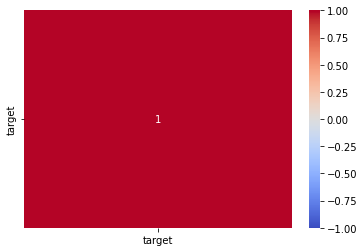

In [ ]:
corr = y_test_final.corr()
print(corr["target"])
condition = np.abs(corr["target"]) > 0.5
top_corr = corr.loc[condition, condition]
sns.heatmap(top_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

In [ ]:
y_train_log = y_train_final["target"]
X_train_log = y_train_final.drop(["target"], axis=1)
y_test_log = y_test_final["target"]
X_test_log = y_test_final.drop(["target"], axis=1)

In [ ]:
lr_clf = LogisticRegression(random_state=seed)#, class_weight={0:1, 1:10})
lgbm_clf = LGBMClassifier(random_state=seed)
cat_clf = CatBoostClassifier(random_state=seed, verbose=False)

calibrated_clf = CalibratedClassifierCV(lgbm_clf, cv=5)
result_dict = evaluate_model(calibrated_clf, X_train_log, y_train_log, X_test_log, y_test_log)

roc_auc_score for model CalibratedClassifierCV = 0.839


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59543
           1       0.24      0.11      0.15       410

    accuracy                           0.99     59953
   macro avg       0.62      0.55      0.57     59953
weighted avg       0.99      0.99      0.99     59953

                         Confusion Matrix


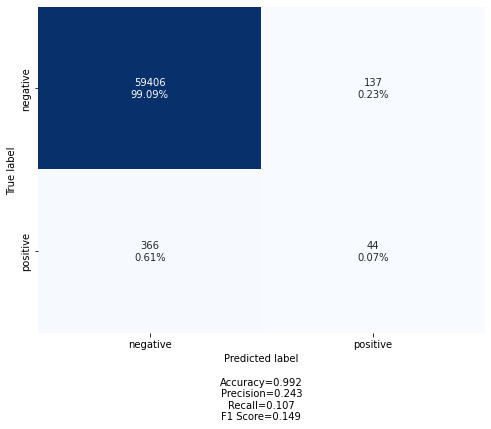

In [ ]:
#clf = LogisticRegression(**lr_bp, random_state=seed)
calibrated_clf.fit(X_train_log, y_train_log)
originalclass_lr = y_test_log
predictedclass_lr = calibrated_clf.predict(X_test_log)
print(classification_report(originalclass_lr, predictedclass_lr))
print(25*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["negative", "positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)